In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"../data/raw/training.1600000.processed.noemoticon.csv", encoding='latin', on_bad_lines='skip', header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [26]:
df.shape

(1600000, 3)

In [4]:
df=df[[0,5]]
df.rename(columns={0:'Sentiment',5:'Text'},inplace=True)
df['Sentiment']=df['Sentiment'].replace(4,1) 

In [5]:
df.head()

,Sentiment,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')  # Tambahkan baris ini untuk mengunduh stopwords
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import re


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bima.rianto/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bima.rianto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
url_mention_pattern = re.compile(r"(?:\@|https?\://)\S+|[^\w\s#]")

In [8]:
def cleansing_tweet(tweet):
    # Konversi ke lowercase
    tweet = tweet.lower()
    
    # Hapus URL, mentions, dan karakter non-alfanumerik kecuali hashtag
    tweet = url_mention_pattern.sub('', tweet)
    
    # Tokenisasi berdasarkan spasi
    tokens = tweet.split()
    
    # Lematisasi dan filter stopwords dan token pendek
    lemmatized_tokens = [
        lemmatizer.lemmatize(token) 
        for token in tokens 
        if token not in stop_words and len(token) > 1
    ]
    
    # Gabungkan kembali token menjadi tweet yang telah diproses
    processed_tweet = ' '.join(lemmatized_tokens)
    
    return processed_tweet

In [9]:
df['tweet_clean']=[cleansing_tweet(txt) for txt in df['Text']]

In [10]:
df.head()

,Sentiment,Text,tweet_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save 50 rest go b...
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


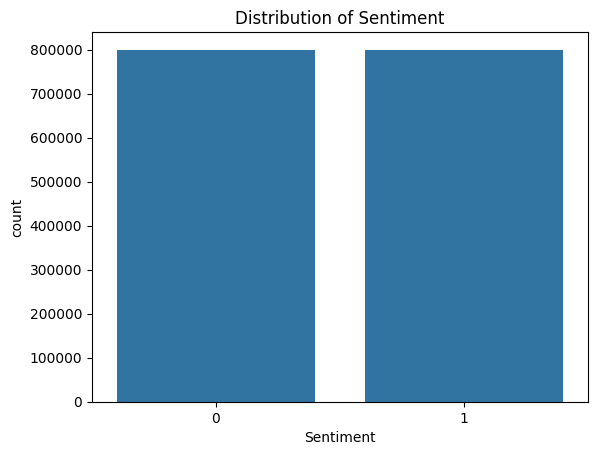

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiment')
plt.show()

In [12]:
df['tweet_length'] = df['tweet_clean'].apply(len)
# Menghitung statistik deskriptif dari panjang tweet
tweet_length_stats = df['tweet_length'].describe()

# Menampilkan statistik deskriptif dengan format yang lebih mudah dibaca
print(f"Count: {tweet_length_stats['count']:.0f}")
print(f"Mean: {tweet_length_stats['mean']:.2f}")
print(f"Std Dev: {tweet_length_stats['std']:.2f}")
print(f"Min: {tweet_length_stats['min']:.0f}")
print(f"25%: {tweet_length_stats['25%']:.0f}")
print(f"50% (Median): {tweet_length_stats['50%']:.0f}")
print(f"75%: {tweet_length_stats['75%']:.0f}")
print(f"Max: {tweet_length_stats['max']:.0f}")



Count: 1600000
Mean: 42.72
Std Dev: 24.14
Min: 0
25%: 23
50% (Median): 39
75%: 60
Max: 177


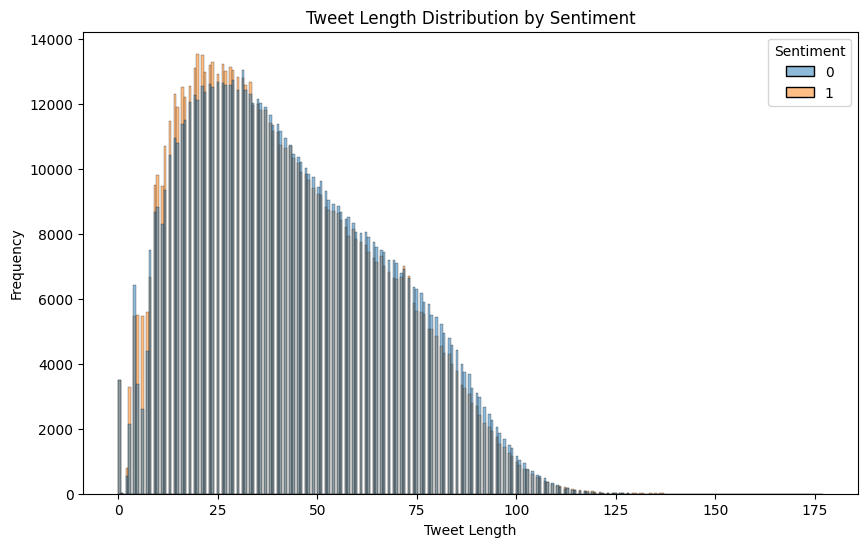

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tweet_length', hue='Sentiment')
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


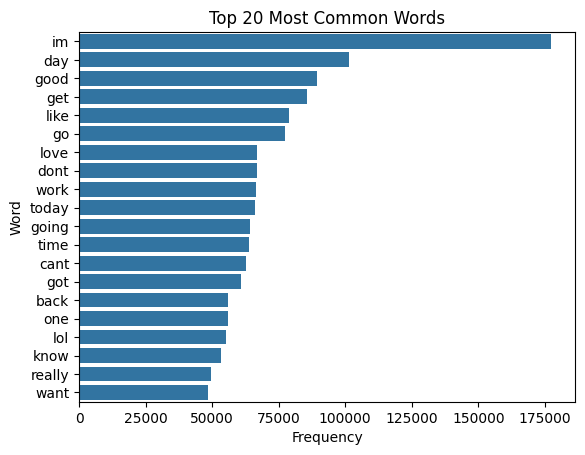

In [14]:
from collections import Counter
import itertools

all_words = list(itertools.chain(*df['tweet_clean'].str.split()))
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

word_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=word_df)
plt.title('Top 20 Most Common Words')
plt.show()


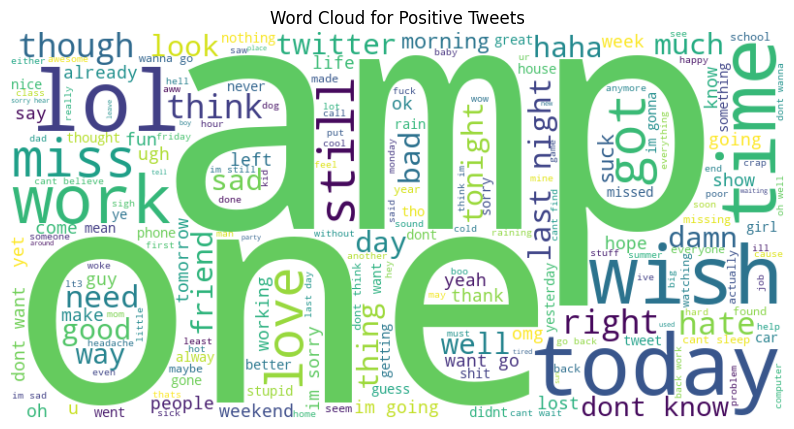

In [15]:
from wordcloud import WordCloud

positive_tweets = df[df['Sentiment'] == 0]['tweet_clean'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['tweet_clean'], df['Sentiment'], test_size=0.2, random_state=42)

# Word2Vec 

In [18]:
from gensim.models import Word2Vec

# Latih model Word2Vec
model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)


In [20]:
def vectorize_sentence(sentence, model):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(word_vectors) == 0:
        # Jika tidak ada kata yang ditemukan dalam model, kembalikan vektor nol
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Konversi teks ke vektor untuk training dan testing data
X_train_vec = np.array([vectorize_sentence(sentence, model) for sentence in X_train])
X_test_vec = np.array([vectorize_sentence(sentence, model) for sentence in X_test])


# Word2Vec + XgBoost

In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [26]:



# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_vec, label=y_train.values)
dtest = xgb.DMatrix(X_test_vec, label=y_test.values)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Predict and evaluate
y_pred = bst.predict(dtest)
y_pred_binary = [1 if prob >= 0.5 else 0 for prob in y_pred]

accuracy = accuracy_score(y_test.values, y_pred_binary)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test.values, y_pred_binary))


[0]	test-logloss:0.69090
[1]	test-logloss:0.68890
[2]	test-logloss:0.68714
[3]	test-logloss:0.68558
[4]	test-logloss:0.68415
[5]	test-logloss:0.68287
[6]	test-logloss:0.68175
[7]	test-logloss:0.68068
[8]	test-logloss:0.67968
[9]	test-logloss:0.67873
[10]	test-logloss:0.67778
[11]	test-logloss:0.67700
[12]	test-logloss:0.67619
[13]	test-logloss:0.67550
[14]	test-logloss:0.67475
[15]	test-logloss:0.67408
[16]	test-logloss:0.67332
[17]	test-logloss:0.67268
[18]	test-logloss:0.67212
[19]	test-logloss:0.67153
[20]	test-logloss:0.67106
[21]	test-logloss:0.67047
[22]	test-logloss:0.66997
[23]	test-logloss:0.66949
[24]	test-logloss:0.66904
[25]	test-logloss:0.66849
[26]	test-logloss:0.66803
[27]	test-logloss:0.66761
[28]	test-logloss:0.66716
[29]	test-logloss:0.66685
[30]	test-logloss:0.66657
[31]	test-logloss:0.66616
[32]	test-logloss:0.66581
[33]	test-logloss:0.66543
[34]	test-logloss:0.66509
[35]	test-logloss:0.66475
[36]	test-logloss:0.66436
[37]	test-logloss:0.66405
[38]	test-logloss:0.66

# Word2vec + Neural Network

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [22]:


# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_vec, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_vec, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [23]:
# Define the neural network model
class SentimentNet(nn.Module):
    def __init__(self, input_dim):
        super(SentimentNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x



In [24]:
# Initialize the model, loss function, and optimizer
input_dim = X_train_vec.shape[1]
model_nn = SentimentNet(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_nn.parameters(), lr=0.001)

# Training loop
num_epochs = 10
model_nn.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        outputs = model_nn(inputs).squeeze()
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/10, Loss: 0.7173317670822144
Epoch 2/10, Loss: 0.6059003472328186
Epoch 3/10, Loss: 0.6727361083030701
Epoch 4/10, Loss: 0.6885637044906616
Epoch 5/10, Loss: 0.6720341444015503
Epoch 6/10, Loss: 0.6964144706726074
Epoch 7/10, Loss: 0.6358511447906494
Epoch 8/10, Loss: 0.6334601640701294
Epoch 9/10, Loss: 0.6479355692863464
Epoch 10/10, Loss: 0.5843545794487


In [25]:
# Evaluation
model_nn.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_nn(inputs).squeeze()
        predicted = (outputs >= 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy}')

Accuracy: 0.60723125


# TF IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# TF IDF + XGBOOST

In [20]:

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_tfidf, label=y_train.values)
dtest = xgb.DMatrix(X_test_tfidf, label=y_test.values)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Predict and evaluate
y_pred = bst.predict(dtest)
y_pred_binary = [1 if prob >= 0.5 else 0 for prob in y_pred]

accuracy = accuracy_score(y_test.values, y_pred_binary)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test.values, y_pred_binary))


[0]	test-logloss:0.68793
[1]	test-logloss:0.68353
[2]	test-logloss:0.67986
[3]	test-logloss:0.67660
[4]	test-logloss:0.67281
[5]	test-logloss:0.66993
[6]	test-logloss:0.66733
[7]	test-logloss:0.66490
[8]	test-logloss:0.66252
[9]	test-logloss:0.66026
[10]	test-logloss:0.65815
[11]	test-logloss:0.65625
[12]	test-logloss:0.65370
[13]	test-logloss:0.65186
[14]	test-logloss:0.64999
[15]	test-logloss:0.64823
[16]	test-logloss:0.64612
[17]	test-logloss:0.64463
[18]	test-logloss:0.64297
[19]	test-logloss:0.64149
[20]	test-logloss:0.64012
[21]	test-logloss:0.63880
[22]	test-logloss:0.63703
[23]	test-logloss:0.63565
[24]	test-logloss:0.63442
[25]	test-logloss:0.63322
[26]	test-logloss:0.63208
[27]	test-logloss:0.63091
[28]	test-logloss:0.62982
[29]	test-logloss:0.62875
[30]	test-logloss:0.62734
[31]	test-logloss:0.62637
[32]	test-logloss:0.62543
[33]	test-logloss:0.62447
[34]	test-logloss:0.62354
[35]	test-logloss:0.62261
[36]	test-logloss:0.62171
[37]	test-logloss:0.62078
[38]	test-logloss:0.61

# TF-IDF + Neural Network

In [21]:
# Convert TF-IDF matrices to dense format
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

In [22]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_tfidf_dense, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_tfidf_dense, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [23]:
# Define the neural network model
class SentimentNet(nn.Module):
    def __init__(self, input_dim):
        super(SentimentNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

In [24]:
# Initialize the model, loss function, and optimizer
input_dim = X_train_tfidf_dense.shape[1]
model_nn = SentimentNet(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_nn.parameters(), lr=0.001)

# Training loop
num_epochs = 10
model_nn.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        outputs = model_nn(inputs).squeeze()
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/10, Loss: 0.461091548204422
Epoch 2/10, Loss: 0.3381813168525696
Epoch 3/10, Loss: 0.5468791723251343
Epoch 4/10, Loss: 0.5069937705993652
Epoch 5/10, Loss: 0.3836626708507538
Epoch 6/10, Loss: 0.3150642216205597
Epoch 7/10, Loss: 0.5568590760231018
Epoch 8/10, Loss: 0.34603196382522583
Epoch 9/10, Loss: 0.4964885711669922
Epoch 10/10, Loss: 0.4244091212749481


In [25]:
# Evaluation
model_nn.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_nn(inputs).squeeze()
        predicted = (outputs >= 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy}')

Accuracy: 0.7834
